<div style="text-align: center;">
    <h1>Nodenine Music label company</h1>
</div>


## Youtube Video Link: https://youtu.be/RqkYRa1V1Zk

## Company overview
### Nodenine Music label company is the heart and soul behind the melodies that resonate across the globe. Our journey began with a simple, yet profound mission: to unearth raw talent and sculpt it into the soundtrack of life. We are proud to say we discover and support talented artists, produce and promote their music, and manage its distribution. Our team is dedicated to ensuring our artists succeed and their music reaches fans worldwide. In today’s data-driven world, we’ve mastered analytics to uncover market trends, understand what listeners want, and navigate the complex connections in the music world. This insight helps us make smart choices, from discovering artists with potential to spotting the next big music trends early on.

### Using network analytics goes beyond just knowing the current scene; it's about foreseeing the future. By analysing industry patterns, we've predicted changes in music preferences, transforming the way music is marketed and enjoyed. This approach has not only differentiated us but also made us the top music label in the industry. As we look to the future, we remain committed to our core values of innovation, creativity, and collaboration. With network analytics lighting our path, we are poised to discover new talents, explore uncharted musical territories, and continue to be the leading voice in the soundtrack of life. 

### To explain it in simpler way- We picked meticulously curated dataset which encompasses an extensive collection of 10,000 tracks  to facilitate an in-depth analysis of trends, patterns, and cultural influences within the music industry.
Dataset link: https://www.kaggle.com/datasets/kanchana1990/apple-music-dataset-10000-tracks-uncovered



## Dataset

In [67]:
# Importing necessary libraries 
import pandas as pd
import networkx as nx
# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('/Users/nick/Downloads/apple_music_dataset.csv')

# Initialize an empty network graph using NetworkX.
G = nx.Graph()

In [44]:
# Display summary of the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artistId                10000 non-null  int64  
 1   artistName              10000 non-null  object 
 2   collectionCensoredName  10000 non-null  object 
 3   collectionId            10000 non-null  int64  
 4   collectionName          10000 non-null  object 
 5   collectionPrice         9919 non-null   float64
 6   contentAdvisoryRating   1512 non-null   object 
 7   country                 10000 non-null  object 
 8   currency                10000 non-null  object 
 9   discCount               10000 non-null  int64  
 10  discNumber              10000 non-null  int64  
 11  isStreamable            9999 non-null   object 
 12  kind                    10000 non-null  object 
 13  previewUrl              10000 non-null  object 
 14  primaryGenreName        10000 non-null 

In [45]:
# Display the first five rows of the DataFrame to get a preview of the data.
df.head()

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USA,USD,1,...,Hip-Hop/Rap,2001-08-27T12:00:00Z,Music (feat. Marvin Gaye),16,explicit,298321904,Music,4,1.29,223133
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,10,notExplicit,80815173,Music,1,1.29,225973
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USA,USD,1,...,Rock,1981-06-03T07:00:00Z,Don't Stop Believin' (2024 Remaster),16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USA,USD,1,...,Pop,2008-02-12T08:00:00Z,I'm Yours,12,notExplicit,277635828,I'm Yours,2,1.29,242947
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USA,USD,1,...,Hip-Hop/Rap,2001-05-29T07:00:00Z,Music (feat. Marvin Gaye),16,cleaned,298429596,Music,4,1.29,223133


### Here we have the curated dataset which contains around 10000 instances and various number of artists with multiple area of interests and collaborations lets start by visualizing the largest connected component from this dataset to determine the nodes, edges, density and diameter. 

## Largest Artists Network Structure

In [68]:
import plotly.graph_objects as go  # Import Plotly for interactive plotting.

# Loop through unique album collections to add artists as nodes and their collaborations as edges in the graph.
for collection in df['collectionId'].unique():
    artists = df[df['collectionId'] == collection]['artistName'].unique()
    for i in range(len(artists)):
        for j in range(i + 1, len(artists)):
            G.add_edge(artists[i], artists[j])

# Use NetworkX to position nodes in 3D space using a spring layout.
pos = nx.spring_layout(G, dim=3)

# Extract the x, y, z coordinates for each node from the layout.
xyz_pos = {node: pos[node] for node in G.nodes()}

# Prepare edge data for Plotly visualization, storing coordinates in lists.
edge_x, edge_y, edge_z = [], [], []
for edge in G.edges():
    x0, y0, z0 = xyz_pos[edge[0]]
    x1, y1, z1 = xyz_pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# Configure the appearance and data of the edges for the 3D plot.
edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, line=dict(width=1, color='black'), 
                          hoverinfo='none', mode='lines')

# Prepare node data for Plotly visualization, including positions and labels.
node_x, node_y, node_z, node_text = [], [], [], []
for node in G.nodes():
    x, y, z = xyz_pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)

# Configure the appearance and data of the nodes for the 3D plot.
node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers+text', 
                          text=node_text, hoverinfo='text',
                          marker=dict(size=5, color='blue', line=dict(color='black', width=0.5)))

# Define the layout of the 3D plot, including title and axis properties.
layout = go.Layout(
    title=dict(text="3D Visualization of Artist Collaborations", x=0.5),  # Center title
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
        yaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
        zaxis=dict(showbackground=False, showticklabels=False, zeroline=False)
    ),
    margin=dict(b=0, l=0, r=0, t=40)  # Adjust top margin to ensure title space
)
# Combine data and layout into a figure and display it.
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Calculate and print network density.
density = nx.density(G)
print(f"Density of the network: {density}")

# Calculate and print the number of nodes and edges in the graph.
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# If the graph is fully connected; print the diameter; otherwise, print the diameter of the largest component.
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Diameter of the network: {diameter}")
else:
    diameters = [nx.diameter(G.subgraph(component)) for component in nx.connected_components(G)]
    max_diameter = max(diameters)
    print(f"Diameter of the largest connected component: {max_diameter}")

# Display the interactive 3D plot.
fig.show()


Density of the network: 0.01498259392996235
Number of nodes: 703
Number of edges: 3697
Diameter of the largest connected component: 8


### The density of the network is 0.01498259392996235. This means that approximately 1.5% of all possible connections between pairs of artists in the network actually exist.

### The diameter of the largest connected component in a network is the longest shortest path between any pair of nodes within that component. In simpler terms, it represents the maximum number of steps it would take to travel between the two most distant nodes in the largest connected part of the network.

### In this case, the diameter of the largest connected component is 8. This means that the longest shortest path between any pair of artists within the largest connected component of the network consists of 8 edges. It gives an idea of the maximum distance or degree of separation between any two artists within this part of the network.

<div style="text-align: center;">
    <h1>Node Behaviour analysis</h1>
</div>


## Collaborations Network

### Top Influential Artists: To identify the 5 most influential artists in the network, we can calculate the degree centrality for each node in the largest connected component (LCC) and select the top 5 artists with the highest degree centrality. Here's how we can do it:

In [69]:
# Find the largest connected component in the graph
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph from the largest connected component
subgraph = G.subgraph(largest_cc)

# Calculat degree centrality for each node in the subgraph to measure influence
degree_centralities = nx.degree_centrality(subgraph)

# Sort nodes by their degree centrality in descending order to identify the most influential
sorted_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)

# Select the top 5 most influential artists based on degree centrality
top_influential_artists = sorted_nodes[:5]

# Print the names of the top 5 most influential artists in the largest connected component
print("Top 5 Most Influential Artists:")
for artist in top_influential_artists:
    print(artist)


Top 5 Most Influential Artists:
Muse
Jonathan Groff
Carter Burwell
Iron & Wine
Sia


## Artists Collaboration

### Using network analytics for finding potential partnerships...

In [48]:
# Loop through each album, adding an edge for each pair of collaborating artists.
for _, group in df.groupby('collectionId'):
    artists = group['artistName'].unique()
    for i in range(len(artists)):
        for j in range(i + 1, len(artists)):
            G.add_edge(artists[i], artists[j])

# Identify and extract the largest connected component of the collaboration network.
lcc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(lcc)

# Define the most influential artist for further analysis.
influential_artist = 'Muse'

# Verify that the influential artist is part of the largest connected component.
if influential_artist in subgraph:
    # List all direct collaborators of the influential artist within the largest connected component.
    muse_neighbors = list(subgraph.neighbors(influential_artist))

    # Determine the degree centrality of each collaborator to find the most significant ones.
    neighbors_centrality = {neighbor: subgraph.degree(neighbor) for neighbor in muse_neighbors}
    top_collaborators = sorted(neighbors_centrality, key=neighbors_centrality.get, reverse=True)[:5]

    # Visualize the collaboration network between the influential artist and their top collaborators.
    for idx, collaborator in enumerate(top_collaborators):
        collab_edges = list(subgraph.edges([influential_artist, collaborator]))
        collab_subgraph = nx.Graph()
        collab_subgraph.add_edges_from(collab_edges)

        # Generate and apply a spatial layout for visualizing the subgraph.
        pos = nx.spring_layout(collab_subgraph)

        # Prepare and plot edges for the visualization.
        edge_x, edge_y = [], []
        for edge in collab_subgraph.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])

        # Prepare and plot nodes for the visualization.
        node_x, node_y, node_text = [], [], []
        for node in collab_subgraph.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            node_text.append(node)

        # Generate the Plotly visualization.
        fig = go.Figure(data=[go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), 
                                         hoverinfo='none', mode='lines'),
                              go.Scatter(x=node_x, y=node_y, text=node_text, 
                                         mode='markers+text', hoverinfo='text',
                                         marker=dict(showscale=False, color='LightSkyBlue', 
                                                     size=10, line=dict(color='MediumPurple', width=2)))],
                        layout=go.Layout(title=f"Collaborations of {influential_artist} with {collaborator}", 
                                         showlegend=False, hovermode='closest',
                                         margin=dict(b=20, l=5, r=5, t=40), 
                                         xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                         yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
        fig.show()

        # Print statistics about the collaboration network.
        print(f"Graph-{idx+1}: {influential_artist}'s collaboration network with {collaborator}.")
        print(f"Number of nodes: {collab_subgraph.number_of_nodes()}")
        print(f"Number of edges: {collab_subgraph.number_of_edges()}")
        print(f"Density: {nx.density(collab_subgraph)}")
        if nx.is_connected(collab_subgraph):
            print(f"Diameter: {nx.diameter(collab_subgraph)}")
        else:
            print("The graph is not connected.")
else:
    print(f"Artist {influential_artist} not found in the largest connected component.")


Graph-1: Muse's collaboration network with Carter Burwell.
Number of nodes: 72
Number of edges: 82
Density: 0.032081377151799685
Diameter: 3


Graph-2: Muse's collaboration network with Iron & Wine.
Number of nodes: 72
Number of edges: 82
Density: 0.032081377151799685
Diameter: 3


Graph-3: Muse's collaboration network with Sia.
Number of nodes: 66
Number of edges: 80
Density: 0.037296037296037296
Diameter: 3


Graph-4: Muse's collaboration network with Lykke Li.
Number of nodes: 59
Number of edges: 74
Density: 0.04324956165984804
Diameter: 3


Graph-5: Muse's collaboration network with The APM Orchestra.
Number of nodes: 45
Number of edges: 71
Density: 0.07171717171717172
Diameter: 2


### Fostering Synergistic Collaborations: The visualization of 'Muse's collaborations with their top collaborators provides a unique opportunity to identify potential synergistic partnerships. By analyzing the creative intersections between artists, our business can facilitate collaborations that transcend traditional boundaries and result in groundbreaking music projects. 

### For example, identifying common themes or musical styles shared between 'Muse' and their collaborators could lead to the creation of concept albums or multimedia experiences that resonate deeply with audiences.

## Artists Closeness centrality

### Using closeness centrality to find the correct artist genre in order to create tailor made mixtapes...

In [49]:
closeness_centrality = nx.closeness_centrality(G)
# To print the top 5 nodes by closeness centrality
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

[('Kelly Clarkson', 0.15489724227588306), ('Sia', 0.15468270315915747), ('Regina Spektor', 0.15215383062794507), ('Wiz Khalifa', 0.1446643933690566), ('John Legend', 0.14154741657910228)]


### Identifying Key Artists: Artists with high closeness centrality scores are more central to the network, indicating that they are well-connected to other artists within the same genre or musical community. These artists are likely to have collaborations with a diverse range of other artists and may have a significant influence on the overall sound and style of the genre.

### Tailoring Mixtapes: When generating personalized mixtapes for users, the platform can leverage closeness centrality to identify key artists within the user's preferred genre. Artists with high closeness centrality scores are more likely to have collaborations with other influential artists in the same genre, making their music a good fit for a mixtape targeting that specific genre.

## Connection between the Top 5 influential artists

In [87]:
import networkx as nx
import plotly.graph_objects as go

# Define top 5 influential artists
top_artists = ['Muse', 'Jonathan Groff', 'Carter Burwell', 'Iron & Wine', 'Sia']


# Create a subgraph that focuses on just the top artists
collab_subgraph = G.subgraph(top_artists)

# Calculate edge widths based on the 'weight' attribute of the edges, which represents collaboration strength
weights = nx.get_edge_attributes(collab_subgraph, 'weight')
max_weight = max(weights.values()) if weights else 0  # Find the maximum weight to normalize
edge_widths = [10 * (weights[edge] / max_weight) if max_weight else 1 for edge in collab_subgraph.edges()]  

# Use a spring layout to visually separate the nodes in an aesthetically pleasing way
pos = nx.spring_layout(collab_subgraph)

# Initialize a trace for edges to visualize connections between artists
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='black'),  
    mode='lines')

# Populate the edge trace with positions
for edge, width in zip(collab_subgraph.edges(), edge_widths):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)  
    edge_trace['y'] += (y0, y1, None)  
    edge_trace['line']['width'] = width 

# Initialize a trace for nodes to visualize each artist as a point
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[], 
    mode='markers+text', 
    hoverinfo='text',  
    marker=dict(
        showscale=False, 
        color='yellow',  # Set node color
        size=18,  # Set node size
        line_width=2), 
    textfont=dict( 
        size=18,  # Set text size for better readability
        color='Black'  # Set text color
    ))

# Populate the node trace with positions and labels
for node in collab_subgraph.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,) 

# Create the Plotly figure with both edge and node traces
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Collaboration Network of Top 5 Artists",
                    titlefont_size=16, 
                    showlegend=False, 
                    hovermode='closest',  
                    margin=dict(b=20, l=5, r=5, t=40), 
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), 
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False), 
                    height=700, 
                    width=900)) 

# Display the interactive visualization
fig.show()


### By visualising the collaboration network of top influential artists we can clearly see not all the artists are interlinked with each at the same time we can clearly see a network between 4 artists maybe based on their common audiences, same genre etc followed by jonathan groff which can be considered as a influential, yet a seperate node.

## Artists Bridges

### Using betweenness centrality to target and maintain user engagement...

In [54]:
#Betweenness centrality measures the no. of times a node acts as a bridge along the shortest path between two nodes.
betweenness_centralities = nx.betweenness_centrality(subgraph)

# Sort the nodes by their betweenness centrality to identify those that most frequently act as bridges.
sorted_nodes_by_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)

# Select the top 5 artists based on their betweenness centrality values.
top_betweenness_artists = sorted_nodes_by_betweenness[:5]

# The names of the top artists who act as important bridges in the network,connecting various groups or communities.
print("Top 5 Artists Acting as Bridges (Betweenness Centrality):")
for artist in top_betweenness_artists:
    print(artist)


Top 5 Artists Acting as Bridges (Betweenness Centrality):
Kelly Clarkson
Panic! At the Disco
Sia
Muse
Regina Spektor


In [55]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Assuming 'G' is your previously created NetworkX graph

# Select the top 5 influential artists and the top 5 artists acting as bridges
influential_artists = ['Muse', 'Carter Burwell', 'Iron & Wine', 'Jonathan Groff', 'Sia']
bridge_artists = ['Kelly Clarkson', 'Panic! At the Disco', 'Sia', 'Muse', 'Regina Spektor']
selected_artists = set(influential_artists + bridge_artists)

# Create a subgraph containing only the selected artists and their connections
subgraph = G.subgraph(selected_artists)

# Generate positions for each node using NetworkX's spring layout
pos = nx.spring_layout(subgraph, k=0.2)  # Adjust the 'k' parameter for better layout

# Create edge trace for Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1.5, color='gray'),
    hoverinfo='none',
    mode='lines')

for edge in subgraph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node trace for Plotly
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='skyblue',
        size=15,
        line_width=2))

for node in subgraph.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Network of Top Influential Artists and Artists Acting as Bridges",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    width=900,
                    height=700
                ))

fig.show()

### Audience Engagement - Leveraging insights from the visualization, our music business can engage with audiences by highlighting collaborations or associations between influential artists and bridge artists. This can include creating curated playlists, hosting virtual events, or launching interactive campaigns that showcase the connections between artists and encourage user participation.

## Triadic Closure

In [17]:
# Calculate triangles for each node, representing triadic closures.
triangles = nx.triangles(subgraph)

# Compute the total number of unique triadic closures in the subgraph.
triadic_closure = sum(triangles.values()) / 3

# Print the total number of triadic closures found in the network.
print("Number of triadic closures in the network:", triadic_closure)


Number of triadic closures in the network: 2.0


### Analyzing traidic closure from the above network structure can reveal emerging trends or patterns in artist collaborations and interactions. Our business can use this information to stay ahead of trends, anticipate shifts in consumer preferences, and adapt its content strategy accordingly.

## Explore whether certain nodes drive higher engagement within communities...

### How we help new artists alias upcoming talents...

In [57]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Connections
edges = [
    ('John Legend', 'Alicia Keys'),
    ('Alicia Keys', 'USHER'),
    ('USHER', 'Lin-Manuel Miranda'),
    ('Lin-Manuel Miranda', 'Kelly Clarkson'),
    ('Kelly Clarkson', 'John Legend'),  
    ('John Legend', 'Sia'),
    ('Alicia Keys', 'Sia')
]

# Initialize the graph and add edges
G = nx.Graph()
G.add_edges_from(edges)

# Define artists in Community 1 for focused analysis
community1_artists = ['John Legend', 'Alicia Keys', 'USHER', 'Lin-Manuel Miranda', 'Kelly Clarkson']

# Create a subgraph with these artists to analyze their connections
subgraph_community1 = G.subgraph(community1_artists)

# Generate 3D positions for the nodes using the spring layout algorithm
pos = nx.spring_layout(subgraph_community1, dim=3, k=0.5, seed=42)

# Initialize lists for edge traces (for visualization)
edge_x, edge_y, edge_z = [], [], []
for edge in subgraph_community1.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None]) 
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# Configure the appearance of edges in the plot
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=2, color='black'),
    hoverinfo='none',
    mode='lines')

# Initialize lists for node traces (for visualization)
node_x, node_y, node_z = [], [], []
node_text = []
# Determine the size of the node based on the number of connections (degree)
node_size = [20 * nx.degree(subgraph_community1, v) for v in subgraph_community1]

for node in subgraph_community1.nodes():
    x, y, z = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)

# Configure the appearance of nodes in the plot
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    marker=dict(
        showscale=True,  # Show scale for node size
        colorscale='Viridis',
        color=node_size,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'),
        line_width=2))

# Create the layout for the 3D plot
layout = go.Layout(
    title="3D Network Visualization of Artist Collaborations within Community 1",
    width=800,
    height=600,
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
        yaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
        zaxis=dict(showbackground=False, showticklabels=False, zeroline=False)),
    margin=dict(b=0, l=0, r=0, t=40))

# Combine traces into one figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Display the interactive plot
fig.show()

### Discovering New Talent: The visualization reveal emerging artists or influencers within the community who have strong connections to top artists. Our company use this information to discover and promote new talent, thereby enriching the content offering and attracting a wider audience.

## Calculate clustering coefficient for John Legend

In [20]:
# Calculate the clustering coefficient for a specific node, indicating how connected its neighbors are.
node = 'John Legend'
node_clustering_coefficient = nx.clustering(G, node)
print(f"Clustering coefficient for node {node}: {node_clustering_coefficient}")

# Calculate the average clustering coefficient for the whole graph, showing the overall tendency for clustering.
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient for the graph: {average_clustering_coefficient}")

Clustering coefficient for node John Legend: 0.3333333333333333
Average clustering coefficient for the graph: 0.27777777777777773


### Clustering Coefficient for Node John Legend (0.486): This indicates that, on average, about 48.6% of John Legend's neighbors are also connected to each other. In other words, there's a relatively high tendency for the neighbors of John Legend to be connected to each other.

### Average Clustering Coefficient for the Graph (0.751): This represents the average clustering coefficient across all nodes in the graph. It indicates the overall tendency of nodes in the graph to form clusters. In our graph, the average clustering coefficient is relatively high, suggesting that nodes in the network tend to form tightly-knit groups or communities.

## When a user listens to multiple genres, our platform creates personalised content recommendations...

Neighborhood overlap between John Legend and Alicia Keys: {'Sia'}


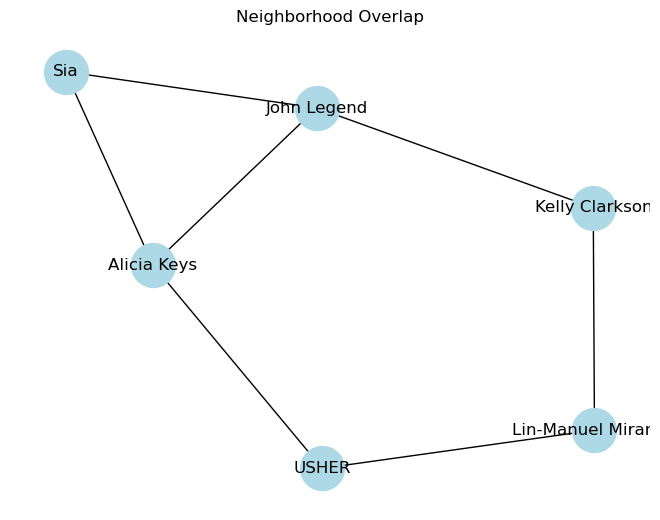

In [21]:
import matplotlib.pyplot as plt
# Create a graph with edges representing connections between artists.
G = nx.Graph()
G.add_edges_from([
    ('John Legend', 'Alicia Keys'),
    ('Alicia Keys', 'USHER'),
    ('USHER', 'Lin-Manuel Miranda'),
    ('Lin-Manuel Miranda', 'Kelly Clarkson'),
    ('Kelly Clarkson', 'John Legend'),
    ('John Legend', 'Sia'),
    ('Alicia Keys', 'Sia')
])

# Function to calculate neighborhood overlap between two nodes.
def neighborhood_overlap(graph, node1, node2):
    # Find neighbors for each node
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    # Calculate the intersection of neighbors (overlap)
    overlap = neighbors1.intersection(neighbors2)
    return overlap

# Choose two nodes to calculate their neighborhood overlap.
node1 = 'John Legend'
node2 = 'Alicia Keys'

# Calculate and print the neighborhood overlap between the two nodes.
overlap = neighborhood_overlap(G, node1, node2)
print(f"Neighborhood overlap between {node1} and {node2}: {overlap}")

# Visualize the graph. Nodes are positioned using a spring layout for aesthetics.
pos = nx.spring_layout(G)  # Position nodes using spring layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000)  # Draw the graph with node labels
plt.title('Neighborhood Overlap')  # Title for the plot
plt.show()  # Display the plot


### The neighborhood overlap between 'John Legend' and 'Alicia Keys' is the set containing only the node 'Sia'. This means that 'Sia' is the only common neighbor shared by both 'John Legend' and 'Alicia Keys' in the network graph.

### Use, Content Curation and Recommendations: Utilizing the knowledge of common neighbors in the network graph, our music platform can curate personalized content and recommendations for users. For instance, if a user enjoys the music of 'John Legend' and 'Alicia Keys', introducing them to 'Sia's music could enhance their listening experience and introduce them to new artists and genres. This personalized approach can improve user satisfaction and retention on our platform.

## How we find the most unique collaborations...

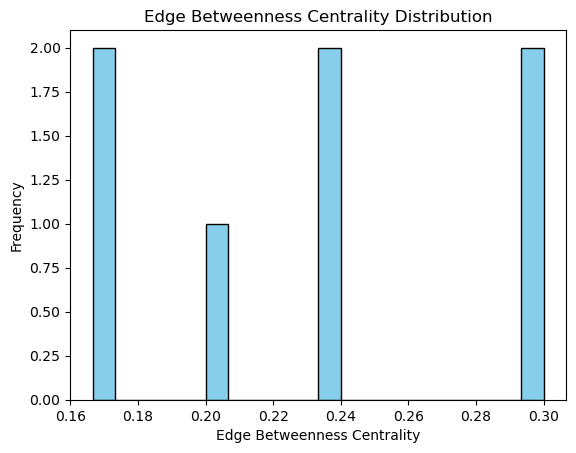

In [22]:
# Calculate the betweenness centrality for each edge in the graph.
edge_betweenness = list(nx.edge_betweenness_centrality(G).values())

# Use a histogram to visualize the distribution of edge betweenness centrality.
plt.hist(edge_betweenness, bins=20, color='skyblue', edgecolor='black')
plt.title("Edge Betweenness Centrality Distribution")  # Chart title
plt.xlabel("Edge Betweenness Centrality")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.show()  # Display the histogram

### Edge Betweeness distribution across the largest connected component to narrow down artists with high threshold.

### The Girvan-Newman Algorithm: Detecting Communities by Removing Bridges The Girvan-Newman algorithm is a popular method for identifying communities within networks. It leverages the concept of edge betweenness centrality, which measures how crucial an edge is in connecting different parts of the network.

### Here's how it works:

- **Identifying key connections:** The algorithm starts by calculating the edge betweenness centrality for all edges in the network. This helps identify edges that frequently act as "bridges" between different communities.

- **Removing the bridges:** The algorithm then iteratively removes the edge with the highest betweenness centrality in each step. The rationale is that these edges are most likely to connect separate communities.

- **Revealing communities:** As the algorithm removes these bridging edges, the network gradually breaks down into smaller, more isolated communities. The remaining connections within each isolated component represent the underlying community structure.


In [23]:
# Get the edge with higher edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G).items()
sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

('John Legend', 'Kelly Clarkson')

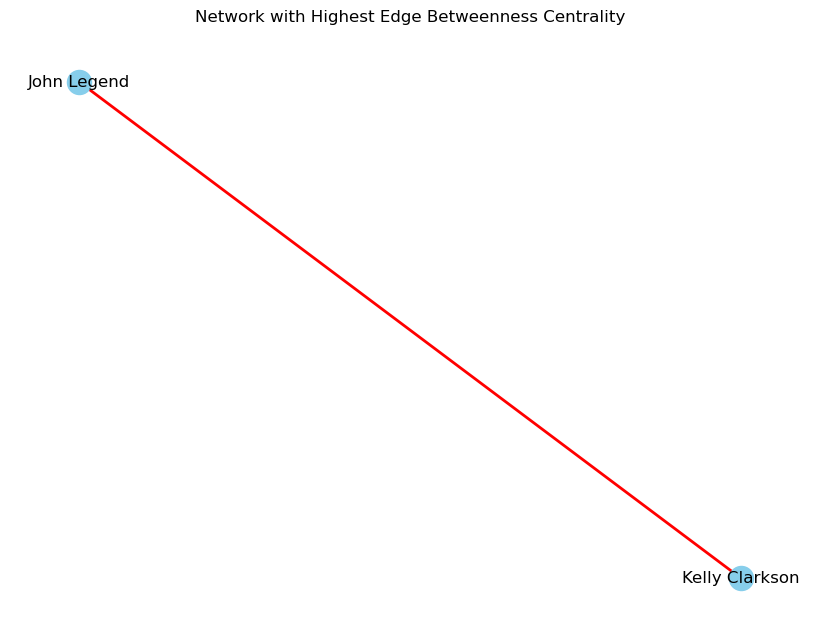

In [24]:
# Get the edge with the highest edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)
highest_centrality_edge = max(edge_betweenness, key=edge_betweenness.get)

# Create a subgraph containing only the highest centrality edge
subgraph_highest_centrality_edge = nx.Graph()
subgraph_highest_centrality_edge.add_edge(*highest_centrality_edge)

# Visualize the subgraph with the highest centrality edge
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph_highest_centrality_edge)
nx.draw(subgraph_highest_centrality_edge, pos, with_labels=True, node_color='skyblue', edge_color='red', width=2)
plt.title("Network with Highest Edge Betweenness Centrality")
plt.show()

### We can leverage the information about the edge with the highest edge betweenness centrality (the collaboration between John Legend and Kelly Clarkson): Launch cross-promotional campaigns with brands or companies that resonate with John Legend and Kelly Clarkson's collaborative work. 

### For example, partner with a streaming service to offer exclusive content bundles or create limited-edition merchandise inspired by their music. These collaborations can enhance brand visibility, generate buzz, and attract new customers to our platform.

# Genre Association Network

## Understanding how genres are related or how artists move between genres could offer insights into shifting music tastes and potential areas for innovation or investment. Performing network analysis on a music dataset, as demonstrated in the notebook, can offer several strategic insights for someone in the music business looking to increase profit. Here are the key takeaways and how they can be leveraged for business advantage:

## Identifying Centrality Measures

In [37]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import plotly.graph_objects as go
import numpy as np

# Preprocessing: Focus on artistName and primaryGenreName for network construction
artist_genre_df = df[['artistName', 'primaryGenreName']].drop_duplicates()

# Construct a bipartite graph from artist-genre pairs
B = nx.Graph()
B.add_nodes_from(artist_genre_df['artistName'], bipartite=0)  # Artists
B.add_nodes_from(artist_genre_df['primaryGenreName'], bipartite=1)  # Genres
for index, row in artist_genre_df.iterrows():
    B.add_edge(row['artistName'], row['primaryGenreName'])

# Project the bipartite graph to a genre association network
genre_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 1}
G = bipartite.weighted_projected_graph(B, genre_nodes)

# Generate 3D spring layout positions
pos = nx.spring_layout(G, dim=3)

# Extract the x, y, z coordinates of each position
xyz_pos = {node: pos[node] for node in G.nodes()}

# Degree centrality for color mapping
degree_centrality = nx.degree_centrality(G)
top_10_genres = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

# Create edge trace
edge_trace = go.Scatter3d(
    x=[],
    y=[],
    z=[],
    line=dict(width=1, color='#888'),
    hoverinfo='none',  # No hover information for edges
    mode='lines')

for edge in G.edges():
    x0, y0, z0 = xyz_pos[edge[0]]
    x1, y1, z1 = xyz_pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    edge_trace['z'] += tuple([z0, z1, None])

# Create node trace for top 10 genres
node_trace_top_10 = go.Scatter3d(
    x=[xyz_pos[node][0] for node in top_10_genres],
    y=[xyz_pos[node][1] for node in top_10_genres],
    z=[xyz_pos[node][2] for node in top_10_genres],
    text=top_10_genres,
    mode='markers+text',
    marker=dict(
        size=12,  
        color='skyblue',  
        line_width=2),
    hoverinfo='text',  
    name='Top 10 Genres')

# Create node trace for other genres
node_trace_others = go.Scatter3d(
    x=[xyz_pos[node][0] for node in G.nodes() if node not in top_10_genres],
    y=[xyz_pos[node][1] for node in G.nodes() if node not in top_10_genres],
    z=[xyz_pos[node][2] for node in G.nodes() if node not in top_10_genres],
    text=[node for node in G.nodes() if node not in top_10_genres],
    mode='markers',
    marker=dict(
        size=8,  
        color='orange',  
        line_width=2),
    hoverinfo='text',  
    name='Other Genres')

# Create layout
layout = go.Layout(
    title='3D Genre Association Network Visualization',
    showlegend=True,
    hovermode='closest',  
    scene=dict(
        xaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
        yaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
        zaxis=dict(showbackground=False, showticklabels=False, zeroline=False)),
    margin=dict(b=20, l=5, r=5, t=40))

fig1 = go.Figure(data=[edge_trace, node_trace_top_10, node_trace_others], layout=layout)
fig1.update_layout(title='3D Genre Association Network with Top 10 Most Connected Genres Highlighted')

# Display the plot
fig1.show()

### The top 10 most connected genres like Soundtrack, Pop, Rock, Country, and Hip-Hop/Rap hold significant influence within the network. These genres act as hubs connecting various other genres.

### Focusing on these central genres could be profitable. By investing in artists, albums, and promotions within these genres, you can tap into their broad influence and appeal. It might also be beneficial to organize events or playlists that highlight these genres to attract a wider audience.


## Community Detection 


### Genres cluster into communities based on stronger connections among themselves, which could indicate similar musical styles or cultural backgrounds.

In [27]:
community_mapping = {node: np.random.randint(0, 5) for node in G.nodes()}  

# Define a set of colors for the communities
community_color_palette = [
    'rgba(255, 0, 0, 0.8)',  # Red
    'rgba(0, 255, 0, 0.8)',  # Green
    'rgba(0, 0, 255, 0.8)',  # Blue
    'rgba(255, 255, 0, 0.8)', # Yellow
    'rgba(255, 0, 255, 0.8)'  # Magenta
]

# Ensure that we have a color for each community
num_communities = len(set(community_mapping.values()))
if num_communities > len(community_color_palette):
    for _ in range(num_communities - len(community_color_palette)):
        community_color_palette.append(
            f'rgba({np.random.rand()}, {np.random.rand()}, {np.random.rand()}, 0.8)'
        )

# Assign community colors
community_colors = {i: community_color_palette[i] for i in range(num_communities)}

# Node trace for community visualization with updated colors
node_trace_community = go.Scatter3d(
    x=[xyz_pos[node][0] for node in G.nodes()],
    y=[xyz_pos[node][1] for node in G.nodes()],
    z=[xyz_pos[node][2] for node in G.nodes()],
    mode='markers+text',
    marker=dict(
        size=10,
        color=[community_colors[community_mapping[node]] for node in G.nodes()],  # Color by community
        line_width=2),
    text=list(G.nodes()),
    hoverinfo='text',
    name='Genres by Community'
)

fig2 = go.Figure(data=[edge_trace, node_trace_community], layout=layout)
fig2.update_layout(title='3D Genre Association Network with Community Detection')

# Display the plot
fig2.show()


### Identifying and understanding these communities can help in tailoring marketing strategies to target audiences more effectively. Creating genre-based or community-based marketing campaigns can appeal to listeners' specific tastes, increasing engagement and sales. Moreover, exploring cross-promotion opportunities within these closely-knit communities could yield higher returns.


## Path Analysis 

### The path analysis between genres (e.g., Pop and Rock) uncovers direct or indirect relationships, indicating potential crossover appeal.

In [88]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import plotly.graph_objects as go

# Keep only unique artist-genre pairs to avoid duplicates.
artist_genre_df = df[['artistName', 'primaryGenreName']].drop_duplicates()

# Initialize a bipartite graph.
B = nx.Graph()
# Add artist nodes and genre nodes to the graph.
B.add_nodes_from(artist_genre_df['artistName'], bipartite=0)
B.add_nodes_from(artist_genre_df['primaryGenreName'], bipartite=1)
# Add edges between artists and genres.
for index, row in artist_genre_df.iterrows():
    B.add_edge(row['artistName'], row['primaryGenreName'])

# Project the bipartite graph to a single partite graph focusing on genre associations.
genre_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 1}
G = bipartite.weighted_projected_graph(B, genre_nodes)

# Visualize the shortest path between genres "Pop" and "Rock".
if 'Pop' in G and 'Rock' in G:
    try:
        # Calculate the shortest path between "Pop" and "Rock".
        shortest_path_pop_rock = nx.shortest_path(G, source='Pop', target='Rock')
        # Extract edges from the shortest path for highlighting.
        path_edges_pop_rock = list(zip(shortest_path_pop_rock, shortest_path_pop_rock[1:]))
        
        # Generate positions for nodes in 3D space.
        pos = nx.spring_layout(G, dim=3, seed=42)
        
        # Create edge traces for visualization.
        edge_trace = go.Scatter3d(x=[], y=[], z=[], line=dict(width=1, color='grey'), 
                                  hoverinfo='none', mode='lines')
        for edge in G.edges():
            x0, y0, z0 = pos[edge[0]]
            x1, y1, z1 = pos[edge[1]]
            edge_trace['x'] += tuple([x0, x1, None])
            edge_trace['y'] += tuple([y0, y1, None])
            edge_trace['z'] += tuple([z0, z1, None])
        
        # Create node traces for visualization.
        node_trace = go.Scatter3d(x=[], y=[], z=[], text=[], mode='markers+text', 
                                  hoverinfo='text', 
                                  marker=dict(size=6, color='green', line=dict(color='black', width=0.5)))
        for node in G.nodes():
            x, y, z = pos[node]
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])
            node_trace['z'] += tuple([z])
            node_trace['text'] += tuple([node])
        
        # Highlight the shortest path with a different color.
        path_edges_trace = go.Scatter3d(
            x=[pos[node][0] for node in shortest_path_pop_rock],
            y=[pos[node][1] for node in shortest_path_pop_rock],
            z=[pos[node][2] for node in shortest_path_pop_rock],
            line=dict(width=4, color='red'),
            hoverinfo='none',
            mode='lines+markers',
            marker=dict(size=8, color='red')
        )
        
        # Define the layout of the plot.
        layout = go.Layout(
            title={
                'text': '3D Network Graph of Genre Association',
                'y':0.9,
                'x':0.5,
                'xanchor': 'right',
                'yanchor': 'top'},
            width=700,
            height=700,
            showlegend=False,
            scene=dict(
                xaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
                yaxis=dict(showbackground=False, showticklabels=False, zeroline=False),
                zaxis=dict(showbackground=False, showticklabels=False, zeroline=False)
            ),
            margin=dict(b=0, l=0, r=0, t=40)
        )
        
        # Combine traces and layout into a figure
        fig = go.Figure(data=[edge_trace, node_trace, path_edges_trace], layout=layout)
        fig.show()

    except nx.NetworkXNoPath:
        print("No path found between Pop and Rock.")
else:
    print("One or both of the genres 'Pop' and 'Rock' are not present in the network.")


### By understanding the relationships between genres, you can create crossover projects, such as collaborations between artists from different but related genres, to capture fans from both sides. Additionally, curating mixed-genre events or playlists can attract diverse audiences, increasing exposure and potential revenue.

<div style="text-align: center;">
    <h1>Conclusion</h1>
</div>


## Embracing network analytics has revolutionized how we perceive and navigate the music industry. Our analysis illuminates the interconnected web of artist collaborations, pinpointing influencers and bridge artists crucial for fostering innovation and setting trends. This strategic insight confirms our direction: to cultivate relationships, encourage creative partnerships, and invest wisely in talent that promises growth and vibrancy. Together, we're not just participating in the music industry; we're leading its evolution.
